# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [24]:
# importing the libraries
import sqlite3
import pandas as pd
import numpy as np


In [25]:
# loading the dataset from the database
con = sqlite3.connect('co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,"Daily Advice Thread - March 05, 2025",/r/apple/comments/1j40jv9/daily_advice_thread_...,AutoModerator,9,0,Welcome to the Daily Advice Thread for /r/Appl...
1,Apple introduces the new MacBook Air with the ...,/r/apple/comments/1j43pzb/apple_introduces_the...,Snoop8ball,489,1230,
2,"Apple reveals M3 Ultra, taking Apple silicon t...",/r/apple/comments/1j43qff/apple_reveals_m3_ult...,Snoop8ball,113,433,
3,BREAKING: Apple's Polishing Cloth is confirmed...,/r/apple/comments/1j3ogle/breaking_apples_poli...,Fer65432_Plays,264,6064,
4,"Apple unveils new Mac Studio, the most powerfu...",/r/apple/comments/1j43qq2/apple_unveils_new_ma...,Snoop8ball,49,164,
...,...,...,...,...,...,...
163,Wireless reverse charging being tested in the ...,/r/apple/comments/1it5g3d/wireless_reverse_cha...,Fer65432_Plays,149,919,
164,All iPhones Now Feature OLED Displays,/r/apple/comments/1itet55/all_iphones_now_feat...,ControlCAD,92,254,
165,Apple No Longer Sells Any iPhones With a Home ...,/r/apple/comments/1it9bjj/apple_no_longer_sell...,chrisdh79,120,419,
166,Apple No Longer Sells Any Small iPhones,/r/apple/comments/1itaa9j/apple_no_longer_sell...,ControlCAD,210,327,


In [26]:
# loaded the sentiment dataset
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [27]:
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [28]:
# getting the sentiment score for our dataset
title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [29]:
df['keyword_sentiment'] = title_sentiments

In [30]:
# displaying the dataset
df

,title,link,author,n_comments,score,text,keyword_sentiment
0,"Daily Advice Thread - March 05, 2025",/r/apple/comments/1j40jv9/daily_advice_thread_...,AutoModerator,9,0,Welcome to the Daily Advice Thread for /r/Appl...,0.000000
1,Apple introduces the new MacBook Air with the ...,/r/apple/comments/1j43pzb/apple_introduces_the...,Snoop8ball,489,1230,,0.000000
2,"Apple reveals M3 Ultra, taking Apple silicon t...",/r/apple/comments/1j43qff/apple_reveals_m3_ult...,Snoop8ball,113,433,,0.000000
3,BREAKING: Apple's Polishing Cloth is confirmed...,/r/apple/comments/1j3ogle/breaking_apples_poli...,Fer65432_Plays,264,6064,,0.000000
4,"Apple unveils new Mac Studio, the most powerfu...",/r/apple/comments/1j43qq2/apple_unveils_new_ma...,Snoop8ball,49,164,,0.117647
...,...,...,...,...,...,...,...
163,Wireless reverse charging being tested in the ...,/r/apple/comments/1it5g3d/wireless_reverse_cha...,Fer65432_Plays,149,919,,0.000000
164,All iPhones Now Feature OLED Displays,/r/apple/comments/1itet55/all_iphones_now_feat...,ControlCAD,92,254,,0.000000
165,Apple No Longer Sells Any iPhones With a Home ...,/r/apple/comments/1it9bjj/apple_no_longer_sell...,chrisdh79,120,419,,-0.100000
166,Apple No Longer Sells Any Small iPhones,/r/apple/comments/1itaa9j/apple_no_longer_sell...,ControlCAD,210,327,,-0.142857


<Axes: ylabel='Frequency'>

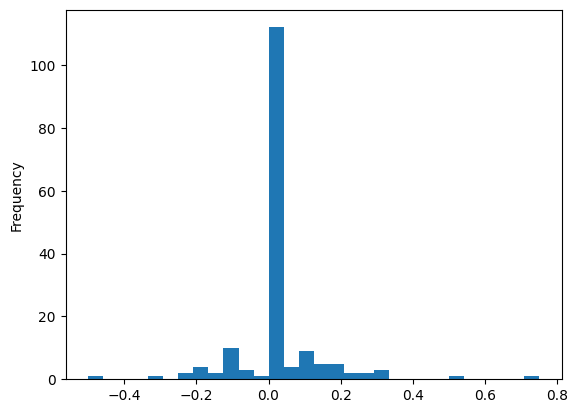

In [31]:
# displaying the histogram for sentiment score
df['keyword_sentiment'].plot.hist(bins=30)

In [32]:
# mean for sentiment score
df['keyword_sentiment'].mean()

0.013975810518682776

In [33]:
# median for sentiment score

df['keyword_sentiment'].median()

0.0

In [34]:
# standard deviation deviation
df['keyword_sentiment'].std()

0.12091732453973725

In [35]:

titles=df['title']

In [36]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
80,The Worst iPod Apple Ever Made.,-0.500000
67,US Probes UK's Apple Encryption Demand for Pos...,-0.300000
106,Apple Abandons Budget Smartphone Market With t...,-0.222222
59,Apple's Find My exploit lets hackers track any...,-0.222222
56,App Tracking Transparency may soon be forbidde...,-0.200000
...,...,...
29,iPhone 16e teardown reveals impressive repaira...,0.300000
113,iOS 18.4 to bring Matter support for compatibl...,0.300000
144,Apple Says 'Severance' Is Now More Popular Tha...,0.300000
153,16e launched,0.500000


In [37]:
# full titles of the bottom 10 sentiments
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['The Worst iPod Apple Ever Made.',
 "US Probes UK's Apple Encryption Demand for Possible Treaty Violation",
 'Apple Abandons Budget Smartphone Market With the iPhone 16e',
 "Apple's Find My exploit lets hackers track any Bluetooth",
 'App Tracking Transparency may soon be forbidden by French authorities',
 'iPhone Feature for Tracking Lost Baggage Expands to American Airlines',
 'Apple Cuts Off Russian Access',
 'Apple explains why MagSafe’s removal from iPhone 16e isn’t a problem',
 'Apple delegates refused to comment on unauthorized transfer of customer data in Korea',
 'Apple No Longer Sells Any Small iPhones']

In [38]:
# full titles of the top 10 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Happy Birthday Steve Jobs',
 '16e launched',
 'iOS 18.4 to bring Matter support for compatible robot vacuums',
 "Apple Says 'Severance' Is Now More Popular Than 'Ted Lasso'",
 'iPhone 16e teardown reveals impressive repairability and surprising battery upgrade',
 "I've made an AI-powered app to help people transform their addictions to useful habits",
 "Sniper Elite 4 is a universal purchase for Mac, iPhone, and iPad.  Such a fun game and runs beautifully.  Can't recommend it enough.",
 "Non-sexy, non-gigantic things you'd like to see Apple fix",
 'iPhone 17 Pro models again rumored to feature 12GB RAM for increased AI support',
 'Apple’s C1 Modem Revealed: Exclusive Behind-the-Scenes Tour | Andru Edwards']

# Summary

Write a short summary of what you did and the results here.

- loaded the dataset from the database 
- loaded the sentiment and values dataset for getting the sentiment score
- got the sentiment score of each row 
- plotted the historgram for sentiment score 
- then calculated the mean, median and standard deviation for the sentiment score
- them anlyzed the top sentiment score for the text and low sentiment score for the text 
 